### Structure of the notebook

- Libraries 
- About
- Datasets structure
- Gathering and cleaning datasets
- Processing and merging datasets
- Strong correlation between emissions and temperature anomaly
- Data visualization to explain the results
- Conclusions

In [1]:
#importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns
import os
from IPython.display import Image

### About

Even though nowadays the hottest topic is the current Covid crisis. I wanted to express through data, that Global Warming is not something we can't leave out to chance. 
In this project I gathered numerous Global and Country indicators to show that the Climate Change issue is one that we need to tackle quickly and unanimously.
If we don't reduce the CO emissions, mitigate deforestation and focus on renewable energies our future could be too hot for us the bear.



<img src="images/Inkedfuture_worlds_LI.jpg" style="width: 500px">
_______________________________________________________________________________________________ source: Gavin Schmidt - TED2014

Here we can see three different scenarios where our planet could end up. The measure is the __temperature anomaly__, which is the difference in degrees celcious from the average temperature of the current year and the mean of the previous 30 years.
- Scenario 1 is if we have some mitigation, but the earth still warms up to fast acting like a threat multiplier.
- Scenario 2 is the right path to take, where we __unanimously__ make tighter climate laws and protocols and we manage to stabilize the temperature and look to revert the damage by the end of the century.
- Scenario 3 is if we keep on doing as we've been doing. In this case, in forty years, humanity will be at great risk.

### Datasets structure

####  - Global Indicators datasets:

1. Annual CO emissions (1751-2017) [global_co]
2. Annual greenhouse gas emissions (1990-2016) [global_ghg]
3. Global CO atmospheric concentration (800.000 BCE - 2018) [co_concentration]
4. Global Temperature Anomaly (1850-2018) [global_a]
5. Ozone-depleting emissions (1961-2014) [caused_ozone]
6. Antartica ozone hole area (1979-2018) [oz_hole]
7. Global average temperature (1850-2015) [annual_global_temp]
8. Fossil fuel consimpiton per capita (1965-2015) [fossil_per_c]
9. Primary energy consumption by source (1800-2018) [global_energy]
10. Modern renewable consumption (1965-2018) [renew_energy]
11. Hubbert's prediction on USA oil production (1991-2016) [hubbert_peak]
12. Share of global primary energy consumtion (1800-2017) [share_energy]
13. Solar PV price and capacity (1976-2018) [solar_price]

#### - Country indicators datasets:

14. CO annual emissions by country (1949-2017) [co_annual]
15. Annual share of CO emissions by country (1949-2017)[co_share]
16. Total greenhouse gas emissions by country (1990-2016) [ghg]
17. Average temperature by country (1743-2017)[annual_temp]

#### - Merged datasets:

18. Global indicators (1751-2018) [global_indicators]
19. Country indicators (1743-2017) [country_indicators]
20. Ozone datasets merged (1979-2014) [ozone_merged]

## Gathering and cleaning the datasets
To reach the final datasets I went through a lot of steps to make sure all had the same structure to merge them, here is the last part of the process.

## Global Indicators

### 1. Annual CO emissions globally (1751-2017)

In [2]:
#importing Annual CO emissions globally
data = pd.read_csv('data//1annual-co-emissions-by-region.csv')
data.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [3]:
#keeping only the global data
global_co = data[data.Entity == 'World']
global_co.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
20353,World,OWID_WRL,1751,9350528.0
20354,World,OWID_WRL,1752,9354192.0
20355,World,OWID_WRL,1753,9354192.0
20356,World,OWID_WRL,1754,9357856.0
20357,World,OWID_WRL,1755,9361520.0


In [4]:
#cleaning the dataset
global_co.drop(['Entity','Code'], axis=1, inplace=True)

C:\Users\Andreu\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
global_co.set_index('Year',inplace=True)

In [6]:
global_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 1751 to 2017
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual CO₂ emissions (tonnes )  267 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


###  2. Total greenhouse gas emissions (1990-2016)

In [7]:
#importing Total greenhouse gas emissions
ghg = pd.read_csv('data//2total-ghg-emissions.csv')
ghg.head()

,Entity,Code,Year,Total GHG emissions including LUCF (tonnes CO₂e)
0,Afghanistan,AFG,1990,15140000.0
1,Afghanistan,AFG,1991,15060000.0
2,Afghanistan,AFG,1992,13600000.0
3,Afghanistan,AFG,1993,13430000.0
4,Afghanistan,AFG,1994,13240000.0


In [8]:
#cleaning the dataset
ghg.drop(['Code'], axis=1, inplace=True)

In [9]:
global_ghg = ghg[ghg.Entity == 'World']
global_ghg.head()

,Entity,Year,Total GHG emissions including LUCF (tonnes CO₂e)
5076,World,1990,3.496734e+10
5077,World,1991,3.512544e+10
5078,World,1992,3.498553e+10
5079,World,1993,3.507963e+10
5080,World,1994,3.528761e+10


In [10]:
global_ghg.drop(['Entity'], axis=1, inplace=True)

C:\Users\Andreu\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
global_ghg = global_ghg.rename(columns={'Total GHG emissions including LUCF (tonnes CO₂e)':'GHG(tonnes CO₂e )'})

In [12]:
global_ghg.set_index('Year',inplace=True)

In [13]:
global_ghg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1990 to 2016
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GHG(tonnes CO₂e )  27 non-null     float64
dtypes: float64(1)
memory usage: 432.0 bytes


### 3. Global CO₂ atmospheric concentration

In [14]:
#importing Global CO₂ atmospheric concentration dataset
co_concentration = pd.read_csv('data//3global-co-concentration-ppm.csv')
co_concentration

,Entity,Code,Year,CO₂ concentration (parts per million)
0,World,OWID_WRL,803719 BCE,207.29
1,World,OWID_WRL,803182 BCE,202.23
2,World,OWID_WRL,802573 BCE,204.86
3,World,OWID_WRL,802060 BCE,207.50
4,World,OWID_WRL,801975 BCE,202.92
...,...,...,...,...
1866,World,OWID_WRL,2014,398.65
1867,World,OWID_WRL,2015,400.83
1868,World,OWID_WRL,2016,404.24
1869,World,OWID_WRL,2017,406.55


In [15]:
#cleaning the data
co_concentration.drop(['Code', 'Entity'], axis=1, inplace=True)

In [16]:
co_concentration = co_concentration.rename(columns={'CO₂ concentration (parts per million)':'CO₂ concentration'})

In [17]:
co_concentration.Year[1648]

'1'

In [18]:
#co_concentration.set_index('Year',inplace=True)

In [19]:
co_concentration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1871 non-null   object 
 1   CO₂ concentration  1871 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.4+ KB


In [20]:
co_atm_conc = co_concentration.drop(co_concentration.index[:1648])

In [21]:
co_atm_conc.head()

,Year,CO₂ concentration
1648,1,276.7
1649,30,277.9
1650,56,277.4
1651,104,277.5
1652,136,278.1


In [22]:
#co_atm_conc.to_csv('co_atm_conc')

### 4. Global Temperature anomaly 1850-2018


In [23]:
#importing Global Temperature anomaly (increase-decreage on previous average temperature)
temperature_a = pd.read_csv('data//4temperature_anomaly.csv')
temperature_a.head()

,Entity,Code,Year,Median (℃),Upper (℃),Lower (℃)
0,Global,NaN,1850,-0.373,-0.339,-0.425
1,Global,NaN,1851,-0.218,-0.184,-0.274
2,Global,NaN,1852,-0.228,-0.196,-0.280
3,Global,NaN,1853,-0.269,-0.239,-0.321
4,Global,NaN,1854,-0.248,-0.218,-0.301


In [24]:
temperature_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      676 non-null    object 
 1   Code        0 non-null      float64
 2   Year        676 non-null    int64  
 3   Median (℃)  676 non-null    float64
 4   Upper (℃)   676 non-null    float64
 5   Lower (℃)   676 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 31.8+ KB


In [25]:
#cleaning the dataset
temperature_a.drop(['Code'], axis=1, inplace=True)

In [26]:
temperature_a.rename(columns={'Entity':'Country'}, inplace=True)

In [27]:
temperature_a.Country.unique()

array(['Global', 'Northern Hemisphere', 'Southern Hemisphere', 'Tropics'],
      dtype=object)

In [28]:
#temperature_a.Year.unique()

In [29]:
temperature_a.head()

,Country,Year,Median (℃),Upper (℃),Lower (℃)
0,Global,1850,-0.373,-0.339,-0.425
1,Global,1851,-0.218,-0.184,-0.274
2,Global,1852,-0.228,-0.196,-0.280
3,Global,1853,-0.269,-0.239,-0.321
4,Global,1854,-0.248,-0.218,-0.301


In [30]:
#keeping only the global data to compare it with the CO emissions and the CO concentration
global_a = temperature_a.where(temperature_a['Country']=='Global')
global_a.dropna(inplace=True)
global_a.drop(['Country'], axis=1, inplace=True)

In [31]:
#global_a.set_index('Year',inplace=True)

In [32]:
global_a.drop(['Upper (℃)','Lower (℃)'],axis=1, inplace=True)

###  5. Ozone depletion substances emissions (CFC's) (1961-2014)

In [33]:
# importing Ozone depleting emissions dataset
ozone = pd.read_csv('data//5ozone-depleting-substance-emissions.csv')
ozone.head()

,Entity,Code,Year,Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)
0,Natural emissions,NaN,1961,165000
1,Natural emissions,NaN,1962,165000
2,Natural emissions,NaN,1963,165000
3,Natural emissions,NaN,1964,165000
4,Natural emissions,NaN,1965,165000


In [34]:
# cleaning the dataset
ozone.drop(['Code'], axis=1, inplace=True)

In [35]:
ozone.rename(columns={'Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)':'Ozone-depleting emissions'}, inplace=True)

In [36]:
ozone.Entity.unique()

array(['Natural emissions', 'Total emissions'], dtype=object)

In [37]:
caused_ozone = ozone[ozone.Entity == 'Total emissions']
caused_ozone.drop(['Entity'],axis=1, inplace=True )

C:\Users\Andreu\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
#ozone.set_index('Year',inplace=True)

In [39]:
caused_ozone.set_index('Year',inplace=True)

### 6. Antartica Ozone Hole area (1979-2017)

In [40]:
#importing Antartica Ozone Hole area dataset
oz_hole = pd.read_csv('data//6antarctic-ozone-hole-area.csv')
oz_hole.head()

,Entity,Code,Year,Maximum ozone hole area (square kilometres),Mean ozone hole area (square kilometres)
0,World,OWID_WRL,1979,1100000,100000
1,World,OWID_WRL,1980,3300000,1400000
2,World,OWID_WRL,1981,3100000,600000
3,World,OWID_WRL,1982,10800000,4800000
4,World,OWID_WRL,1983,12200000,7900000


In [41]:
oz_hole.drop(['Entity', 'Code','Maximum ozone hole area (square kilometres)'], axis=1, inplace=True)

In [42]:
oz_hole.head()

,Year,Mean ozone hole area (square kilometres)
0,1979,100000
1,1980,1400000
2,1981,600000
3,1982,4800000
4,1983,7900000


In [43]:
#oz_hole.set_index('Year',inplace=True)

### 7. Global average temperature (1850-2015)

In [44]:
#importing Global average temperature dataset
global_temperature = pd.read_csv('data//7GlobalTemperatures.csv')
global_temperature.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#cleaning the dataset
global_temperature.dropna(inplace=True)
global_temperature = global_temperature[['dt','LandAverageTemperature','LandAndOceanAverageTemperature']]
global_temperature.head()

,dt,LandAverageTemperature,LandAndOceanAverageTemperature
1200,1850-01-01,0.749,12.833
1201,1850-02-01,3.071,13.588
1202,1850-03-01,4.954,14.043
1203,1850-04-01,7.217,14.667
1204,1850-05-01,10.004,15.507


In [46]:
global_temperature['Year'] = pd.DatetimeIndex(global_temperature['dt']).year
global_temperature.head()

,dt,LandAverageTemperature,LandAndOceanAverageTemperature,Year
1200,1850-01-01,0.749,12.833,1850
1201,1850-02-01,3.071,13.588,1850
1202,1850-03-01,4.954,14.043,1850
1203,1850-04-01,7.217,14.667,1850
1204,1850-05-01,10.004,15.507,1850


In [47]:
#grouping annualy to adapt to the other datasets
annual_global_temp = global_temperature[['Year','LandAverageTemperature','LandAndOceanAverageTemperature']].groupby(['Year']).agg({'LandAverageTemperature':'mean',
                                                                                                                                  'LandAndOceanAverageTemperature':'mean'})
annual_global_temp.head()

,LandAverageTemperature,LandAndOceanAverageTemperature
Year,,
1850,7.900667,14.867167
1851,8.178583,14.991833
1852,8.100167,15.006500
1853,8.041833,14.955167
1854,8.210500,14.991000


In [48]:
annual_global_temp.reset_index(level=0, inplace=True)
annual_global_temp.head()

,Year,LandAverageTemperature,LandAndOceanAverageTemperature
0,1850,7.900667,14.867167
1,1851,8.178583,14.991833
2,1852,8.100167,15.006500
3,1853,8.041833,14.955167
4,1854,8.210500,14.991000


In [49]:
annual_global_temp.set_index('Year',inplace=True)

In [50]:
annual_global_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 1850 to 2015
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LandAverageTemperature          166 non-null    float64
 1   LandAndOceanAverageTemperature  166 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


### 8. Fossil fuel consumption per capita (1965-2015)

In [51]:
#importing Fossil fuel consumption per capita dataset
fossil_per_c = pd.read_csv('data//8fossil-fuel-consumption-per-capita.csv')
fossil_per_c.head()

,Entity,Code,Year,Oil (megawatt-hours),Coal (megawatt-hours),Natural gas (megawatt-hours)
0,Africa,NaN,1965,0.982345,1.040686,0.032724
1,Africa,NaN,1966,1.050340,1.001970,0.035646
2,Africa,NaN,1967,1.014390,1.005197,0.034371
3,Africa,NaN,1968,1.043363,1.021139,0.034195
4,Africa,NaN,1969,1.032230,1.001083,0.039699


In [52]:
#keeping only the global data
fossil_per_c = fossil_per_c[fossil_per_c.Entity == 'World']
fossil_per_c.head()

,Entity,Code,Year,Oil (megawatt-hours),Coal (megawatt-hours),Natural gas (megawatt-hours)
3302,World,OWID_WRL,1965,5.312135,4.887554,2.043343
3303,World,OWID_WRL,1966,5.605541,4.845091,2.178977
3304,World,OWID_WRL,1967,5.883472,4.670063,2.288339
3305,World,OWID_WRL,1968,6.257357,4.643539,2.440440
3306,World,OWID_WRL,1969,6.655013,4.690820,2.622830


In [53]:
#cleaning the dataset
fossil_per_c.drop(['Entity', 'Code',], axis=1, inplace=True)

In [54]:
fossil_per_c.set_index('Year',inplace=True)

In [55]:
fossil_per_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1965 to 2015
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Oil (megawatt-hours)          51 non-null     float64
 1   Coal (megawatt-hours)         51 non-null     float64
 2   Natural gas (megawatt-hours)  51 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB


### 9. Global primary energy by source (1800-2018)

In [56]:
#importing Global primary energy by source dataset
global_energy = pd.read_csv('data//9global-primary-energy.csv')
global_energy.head()

,Entity,Code,Year,Coal (terawatt-hours),Solar (terawatt-hours),Crude oil (terawatt-hours),Natural gas (terawatt-hours),Traditional biofuels (terawatt-hours),Other renewables (terawatt-hours),Hydropower (terawatt-hours),Nuclear (terawatt-hours),Wind (terawatt-hours)
0,World,OWID_WRL,1800,97.22230,0.0,0.0,0.0,5555.555556,0.0,0.0,0.0,0.0
1,World,OWID_WRL,1810,127.77788,0.0,0.0,0.0,5833.333333,0.0,0.0,0.0,0.0
2,World,OWID_WRL,1820,152.77790,0.0,0.0,0.0,6111.111111,0.0,0.0,0.0,0.0
3,World,OWID_WRL,1830,263.88910,0.0,0.0,0.0,6388.888889,0.0,0.0,0.0,0.0
4,World,OWID_WRL,1840,355.55584,0.0,0.0,0.0,6944.444444,0.0,0.0,0.0,0.0


In [57]:
#cleaning the dataset
global_energy.drop(['Entity', 'Code',], axis=1, inplace=True)

In [58]:
global_energy.set_index('Year',inplace=True)

In [59]:
global_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1800 to 2018
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Coal (terawatt-hours)                  71 non-null     float64
 1   Solar (terawatt-hours)                 71 non-null     float64
 2   Crude oil (terawatt-hours)             71 non-null     float64
 3   Natural gas (terawatt-hours)           71 non-null     float64
 4   Traditional biofuels (terawatt-hours)  71 non-null     float64
 5   Other renewables (terawatt-hours)      71 non-null     float64
 6   Hydropower (terawatt-hours)            71 non-null     float64
 7   Nuclear (terawatt-hours)               71 non-null     float64
 8   Wind (terawatt-hours)                  71 non-null     float64
dtypes: float64(9)
memory usage: 5.5 KB


### 10. Modern renewable energy consumtion (1965-2018)

In [60]:
#importing Modern renewable energy consumtion dataset
renew_energy = pd.read_csv('data//10modern-renewable-energy-consumption.csv')
renew_energy.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
0,Africa,NaN,1965,14.278806,0.0,0.0,0.0
1,Africa,NaN,1966,15.649049,0.0,0.0,0.0
2,Africa,NaN,1967,16.158333,0.0,0.0,0.0
3,Africa,NaN,1968,18.622983,0.0,0.0,0.0
4,Africa,NaN,1969,21.582897,0.0,0.0,0.0


In [61]:
#keeping only the global data
renew_energy = renew_energy[renew_energy.Entity == 'World']
renew_energy.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
5037,World,OWID_WRL,1965,919.770276,0.0,0.0,17.985232
5038,World,OWID_WRL,1966,986.285872,0.0,0.0,19.806007
5039,World,OWID_WRL,1967,1009.244569,0.0,0.0,19.986571
5040,World,OWID_WRL,1968,1059.062860,0.0,0.0,22.120045
5041,World,OWID_WRL,1969,1122.442526,0.0,0.0,23.257964


In [62]:
#cleaning the dataset
renew_energy.drop(['Entity', 'Code',], axis=1, inplace=True)

In [63]:
renew_energy.set_index('Year',inplace=True)

In [64]:
renew_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 1965 to 2018
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hydropower (terawatt-hours)        54 non-null     float64
 1   Solar (terawatt-hours)             54 non-null     float64
 2   Wind (terawatt-hours)              54 non-null     float64
 3   Other renewables (terawatt-hours)  54 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB


### 11. Hubbert's peak vs actual oil production (1911-2016)

In [65]:
#importing Hubbert's peak dataset
hubbert_peak = pd.read_csv('data//11hubberts-peak-vs-actual-oil-production-in-the-united-states.csv')
hubbert_peak.head()

,Entity,Code,Year,(barrels per year),(barrels per year).1
0,United States,USA,1910,209557000.0,NaN
1,United States,USA,1911,220449000.0,200158958.0
2,United States,USA,1912,222935000.0,213834803.7
3,United States,USA,1913,248446000.0,228406784.8
4,United States,USA,1914,265763000.0,243928136.8


In [66]:
#cleaning the dataset
hubbert_peak.drop(['Entity', 'Code'], axis=1, inplace=True)

In [67]:
hubbert_peak.rename(columns={' (barrels per year)':'Actual',' (barrels per year).1':'Predicted'}, inplace=True)

In [68]:
hubbert_peak = hubbert_peak.dropna()

In [69]:
hubbert_peak.tail()

,Year,Actual,Predicted
102,2012,2.374136e+09,614194532.6
103,2013,2.725665e+09,577668428.7
104,2014,3.198694e+09,543068744.5
105,2015,3.436515e+09,510324290.7
106,2016,3.248117e+09,479362510.8


In [70]:
#hubbert_peak.set_index('Year',inplace=True)

In [71]:
hubbert_peak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 1 to 106
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       106 non-null    int64  
 1   Actual     106 non-null    float64
 2   Predicted  106 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.3 KB


### 12. Share of global primary energy (1800-2017)

In [72]:
#importing Share of global primary energy dataset
share_energy = pd.read_csv('data//12global-primary-energy-share-inc-biomass.csv')
share_energy.head()

,Entity,Code,Year,Coal (%),Crude oil (%),Hydropower (%),Natural gas (%),Nuclear (%),Other renewables (%),Solar (%),Traditional biofuels (%),Wind (%)
0,World,OWID_WRL,1800,1.719903,0.0,0.0,0.0,0.0,0.0,0.0,98.280097,0.0
1,World,OWID_WRL,1810,2.143525,0.0,0.0,0.0,0.0,0.0,0.0,97.856475,0.0
2,World,OWID_WRL,1820,2.439026,0.0,0.0,0.0,0.0,0.0,0.0,97.560974,0.0
3,World,OWID_WRL,1830,3.966600,0.0,0.0,0.0,0.0,0.0,0.0,96.033400,0.0
4,World,OWID_WRL,1840,4.870628,0.0,0.0,0.0,0.0,0.0,0.0,95.129372,0.0


In [73]:
#cleaning the dataset
share_energy.drop(['Entity', 'Code'], axis=1, inplace=True)

In [74]:
share_energy.set_index('Year',inplace=True)

In [75]:
share_energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1800 to 2017
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Coal (%)                  70 non-null     float64
 1   Crude oil (%)             70 non-null     float64
 2   Hydropower (%)            70 non-null     float64
 3   Natural gas (%)           70 non-null     float64
 4   Nuclear (%)               70 non-null     float64
 5   Other renewables (%)      70 non-null     float64
 6   Solar (%)                 70 non-null     float64
 7   Traditional biofuels (%)  70 non-null     float64
 8   Wind (%)                  70 non-null     float64
dtypes: float64(9)
memory usage: 5.5 KB


### 13. Solar pannels price progression (1976-2016)

In [76]:
#importing Share of global primary energy dataset
solar_price = pd.read_csv('data//13solar-pv-prices-vs-cumulative-capacity.csv')
solar_price.head()

,Entity,Code,Year,Solar PV Module Cost (2016 $ per watt-peak (2016 $/Wp)),Cumulative Installed Capacity (megawatts-peak (MWp)),Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0
3,Afghanistan,AFG,1913,NaN,NaN,5730000.0
4,Afghanistan,AFG,1950,NaN,NaN,8151455.0


In [77]:
#keeping only the global data
solar_price = solar_price[solar_price.Entity == 'World']
solar_price.head()

,Entity,Code,Year,Solar PV Module Cost (2016 $ per watt-peak (2016 $/Wp)),Cumulative Installed Capacity (megawatts-peak (MWp)),Total population (Gapminder)
19946,World,OWID_WRL,1976,66.104835,0.32,NaN
19947,World,OWID_WRL,1977,46.440539,0.77,NaN
19948,World,OWID_WRL,1978,33.282688,1.77,NaN
19949,World,OWID_WRL,1979,29.692493,3.27,NaN
19950,World,OWID_WRL,1980,23.755361,6.57,NaN


In [78]:
#cleaning the dataset
solar_price.drop(['Entity', 'Code','Total population (Gapminder)'], axis=1, inplace=True)

In [79]:
solar_price.rename(columns={'Solar PV Module Cost (2016 $ per watt-peak (2016 $/Wp))':'Solar PV Module Cost($/Wp)','Cumulative Installed Capacity (megawatts-peak (MWp))':'Cumulative Installed Capacity(MWp)'}, inplace=True)

## Country Indicators

### 14. CO annual emissions (1949-2017)

In [80]:
#importing Annual CO per country (1949-2017)
co_annual = pd.read_csv('data//14annual_co2_emissions_per_country.csv')
co_annual.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [81]:
#cleaning the dataset
co_annual.drop(['Code'], axis=1, inplace=True)
co_annual = co_annual.rename(columns={'Annual CO₂ emissions (tonnes)':'Annual CO₂', 'Entity':'Country'})

In [82]:
#keeping only Country indicators
co_annual = co_annual[co_annual.Country != 'World']
#co_annual.Year.unique()
co_annual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20586 entries, 0 to 20852
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     20586 non-null  object 
 1   Year        20586 non-null  int64  
 2   Annual CO₂  20586 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 643.3+ KB


### 15. Annual share of CO per country (1949-2017)

In [83]:
#importing Annual share of CO per country (1949-2017)
co_share = pd.read_csv('data//15annual_share_of_co2_emissions.csv')
co_share.head()

,Entity,Code,Year,Share of global CO₂ emissions (%)
0,Afghanistan,AFG,1949,0.0003
1,Afghanistan,AFG,1950,0.0015
2,Afghanistan,AFG,1951,0.0015
3,Afghanistan,AFG,1952,0.0015
4,Afghanistan,AFG,1953,0.0016


In [84]:
#cleaning the data set
co_share.drop(['Code'], axis=1, inplace=True)

co_share = co_share.rename(columns={'Share of global CO₂ emissions (%)b':'Annual CO₂', 'Entity':'Country'})

co_share.Year.unique()

co_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20586 entries, 0 to 20585
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            20586 non-null  object 
 1   Year                               20586 non-null  int64  
 2   Share of global CO₂ emissions (%)  20586 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 482.6+ KB


###  16. Total greenhouse gas emissions (1990-2016)

In [85]:
#importing Total greenhouse gas emissions
ghg = pd.read_csv('data//2total-ghg-emissions.csv')
ghg.head()

,Entity,Code,Year,Total GHG emissions including LUCF (tonnes CO₂e)
0,Afghanistan,AFG,1990,15140000.0
1,Afghanistan,AFG,1991,15060000.0
2,Afghanistan,AFG,1992,13600000.0
3,Afghanistan,AFG,1993,13430000.0
4,Afghanistan,AFG,1994,13240000.0


In [86]:
#cleaning the dataset
ghg.drop(['Code'], axis=1, inplace=True)

ghg = ghg.rename(columns={'Total GHG emissions including LUCF (tonnes CO₂e)':'GHG(tonnes CO₂e )', 'Entity':'Country'})
#keeping only Country indicators
ghg = ghg[ghg.Country != 'World']
ghg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5183
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            5157 non-null   object 
 1   Year               5157 non-null   int64  
 2   GHG(tonnes CO₂e )  5157 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.2+ KB


### 17. Average temperatures by country (1743-2013)

In [87]:
#importing Global temperatures by country data set
temperature = pd.read_csv('data//17GlobalLandTemperaturesByCountry.csv')
temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [88]:
#cleaning the dataset
temperature['dt']= pd.to_datetime(temperature['dt']) 

temperature['Year'] = pd.DatetimeIndex(temperature['dt']).year
temperature.head()

#keeping only the desired countries, and removing regions
non_wanted = ['Åland','Africa','Asia','Baker Island','Denmark','Federated States Of Micronesia','France', 'French Guiana', 'French Polynesia',
            'French Southern And Antarctic Lands','Gaza Strip','Guadeloupe', 'Guam','Guernsey','Heard Island And Mcdonald Islands','Isle Of Man','Jersey','Kingman Reef',
             'Montserrat','Netherlands (Europe)','Niue','North America','New Caledonia','Northern Mariana Islands','Oceania',
             'Palmyra Atoll','Saint Barthélemy','American Samoa','South America','South Georgia And The South Sandwich Isla',
             'Svalbard And Jan Mayen','Turks And Caicas Islands','United Kingdom','Western Sahara']
for region in non_wanted:
    temperature = temperature[temperature.Country != region]

In [89]:
#grouping by year and agregating the mean so we have the annual mean temperature by country
annual_temp = temperature[['Year', 'Country','AverageTemperature']].groupby(['Year','Country']).agg({'AverageTemperature':'mean'})

#reseting index to adapt it for the future merge
annual_temp.reset_index(level=0, inplace=True)

annual_temp.head()


,Year,AverageTemperature
Country,,
Albania,1743,8.620
Andorra,1743,7.556
Austria,1743,2.482
Belarus,1743,0.767
Belgium,1743,7.106


In [90]:
#one more reset to have country as a column
annual_temp.reset_index(level=0, inplace=True)
annual_temp.head()

,Country,Year,AverageTemperature
0,Albania,1743,8.620
1,Andorra,1743,7.556
2,Austria,1743,2.482
3,Belarus,1743,0.767
4,Belgium,1743,7.106


## Merging datasets

Here we merged the previous datasets into 3 so I can analyse the results using tableau.

### 18. Merging global indicators

In [91]:
#datasets 1 and 2
global_indicators1 = pd.merge(global_co, global_ghg, on='Year', how='outer')

In [92]:
#datasets 1,2,4
global_indicators2 = pd.merge(global_indicators1,global_a, on='Year', how='outer')

In [93]:
#datasets 1,2,4,5
global_indicators3 = pd.merge(global_indicators2,caused_ozone, on='Year', how='outer')

In [94]:
#datasets 1,2,4,5,6
global_indicators4 = pd.merge(global_indicators3,oz_hole, on='Year', how='outer')

In [95]:
#datasets 1,2,4,5,6,7
global_indicators5 = pd.merge(global_indicators4,annual_global_temp, on='Year', how='outer')

In [96]:
#datasets 1,2,4,5,6,7,8
global_indicators6 = pd.merge(global_indicators5,fossil_per_c, on='Year', how='outer')

In [97]:
#datasets 1,2,4,5,6,7,8,9
global_indicators7 = pd.merge(global_indicators6,global_energy, on='Year', how='outer')

In [98]:
#datasets 1,2,4,5,6,7,8,9,10
global_indicators8 = pd.merge(global_indicators7,renew_energy, on='Year', how='outer')

In [99]:
#datasets 1,2,4,5,6,7,8,9,10,12
global_indicators = pd.merge(global_indicators8,share_energy, on='Year', how='outer')

In [100]:
global_indicators.tail()

,Year,Annual CO₂ emissions (tonnes ),GHG(tonnes CO₂e ),Median (℃),Ozone-depleting emissions,Mean ozone hole area (square kilometres),LandAverageTemperature,LandAndOceanAverageTemperature,Oil (megawatt-hours),Coal (megawatt-hours),...,Other renewables (terawatt-hours)_y,Coal (%),Crude oil (%),Hydropower (%),Natural gas (%),Nuclear (%),Other renewables (%),Solar (%),Traditional biofuels (%),Wind (%)
263,2014,3.550583e+10,4.944079e+10,0.579,320000.0,20900000.0,9.570667,15.913000,6.780018,6.197751,...,502.158919,30.129928,34.284243,2.607999,22.798160,1.704505,0.338342,0.132597,7.526348,0.477878
264,2015,3.546275e+10,4.985498e+10,0.763,NaN,25600000.0,9.831000,16.058583,6.838042,5.961733,...,536.466244,29.232112,34.750780,2.597906,23.193692,1.719514,0.359307,0.173580,7.417781,0.555327
265,2016,3.567510e+10,4.935803e+10,0.797,NaN,20700000.0,NaN,NaN,NaN,NaN,...,556.623356,28.479418,35.021326,2.666862,23.616645,1.726446,0.368032,0.216849,7.270446,0.633975
266,2017,3.615326e+10,NaN,0.677,NaN,17400000.0,NaN,NaN,NaN,NaN,...,584.975827,28.254141,34.995960,2.643218,23.896486,1.715909,0.381633,0.288171,7.093508,0.730975
267,2018,NaN,NaN,0.595,NaN,NaN,NaN,NaN,NaN,NaN,...,625.805362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
global_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 267
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      268 non-null    int64  
 1   Annual CO₂ emissions (tonnes )            267 non-null    float64
 2   GHG(tonnes CO₂e )                         27 non-null     float64
 3   Median (℃)                                169 non-null    float64
 4   Ozone-depleting emissions                 54 non-null     float64
 5   Mean ozone hole area (square kilometres)  38 non-null     float64
 6   LandAverageTemperature                    166 non-null    float64
 7   LandAndOceanAverageTemperature            166 non-null    float64
 8   Oil (megawatt-hours)                      51 non-null     float64
 9   Coal (megawatt-hours)                     51 non-null     float64
 10  Natural gas (megawatt-hours)          

In [102]:
#global_indicators.to_csv('global_indicators')

### 19. Merging country indicators

In [103]:
#datasets 1 and 2
country_indicators1 = pd.merge(co_annual, co_share, on=['Year', 'Country'], how='outer')
country_indicators1.head()

,Country,Year,Annual CO₂,Share of global CO₂ emissions (%)
0,Afghanistan,1949,14656.0,0.0003
1,Afghanistan,1950,84272.0,0.0015
2,Afghanistan,1951,91600.0,0.0015
3,Afghanistan,1952,91600.0,0.0015
4,Afghanistan,1953,106256.0,0.0016


In [104]:
country_indicators2 = pd.merge(country_indicators1, ghg, on=['Year', 'Country'], how='outer')

In [105]:
country_indicators = pd.merge(country_indicators2, annual_temp, on=['Year', 'Country'], how='outer' )

In [106]:
country_indicators.head()

,Country,Year,Annual CO₂,Share of global CO₂ emissions (%),GHG(tonnes CO₂e ),AverageTemperature
0,Afghanistan,1949,14656.0,0.0003,NaN,13.350083
1,Afghanistan,1950,84272.0,0.0015,NaN,13.043500
2,Afghanistan,1951,91600.0,0.0015,NaN,13.967750
3,Afghanistan,1952,91600.0,0.0015,NaN,14.175417
4,Afghanistan,1953,106256.0,0.0016,NaN,14.650750


In [107]:
country_indicators.head().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            5 non-null      object 
 1   Year                               5 non-null      int64  
 2   Annual CO₂                         5 non-null      float64
 3   Share of global CO₂ emissions (%)  5 non-null      float64
 4   GHG(tonnes CO₂e )                  0 non-null      float64
 5   AverageTemperature                 5 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 280.0+ bytes


### 20. Merging ozone datasets 1979-2014

In [108]:
ozone_merged = pd.merge(caused_ozone, oz_hole, on='Year')
ozone_merged.head()

,Year,Ozone-depleting emissions,Mean ozone hole area (square kilometres)
0,1979,1110000,100000
1,1980,1080000,1400000
2,1981,1040000,600000
3,1982,1100000,4800000
4,1983,1090000,7900000


In [109]:
oz_hole_emiss_corr = ozone_merged["Ozone-depleting emissions"].corr(ozone_merged["Mean ozone hole area (square kilometres)"])
oz_hole_emiss_corr

-0.5597422292909034

In [110]:
ozone_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Year                                      35 non-null     int64
 1   Ozone-depleting emissions                 35 non-null     int64
 2   Mean ozone hole area (square kilometres)  35 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [111]:
ozone_merged.tail()

,Year,Ozone-depleting emissions,Mean ozone hole area (square kilometres)
30,2010,380000,19400000
31,2011,370000,24700000
32,2012,350000,17800000
33,2013,340000,21000000
34,2014,320000,20900000


In [112]:
ozone_merged.to_csv('ozone_merged')

### CO emissions and median temperature anomaly correlation

Here we have a closer look to the strong correlation between the median annual temperature anomaly and the mean annual CO₂ emissions in tonnes.

In [113]:
co_a_corr = global_indicators["Median (℃)"].corr(global_indicators["Annual CO₂ emissions (tonnes )"])
co_a_corr

0.890288126134981

Text(0, 0.5, 'Median (℃)')

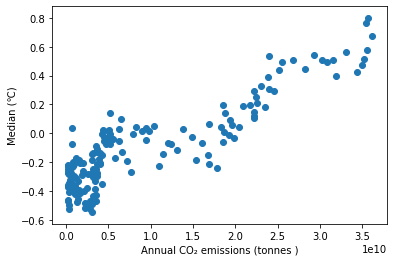

In [114]:
plt.scatter(x=global_indicators['Annual CO₂ emissions (tonnes )'], y=global_indicators['Median (℃)'])
plt.xlabel('Annual CO₂ emissions (tonnes )')
plt.ylabel('Median (℃)')

From both the correlation and the scatter plots, we can see that the more CO₂ emissions the higher will be the mean temperature of earth.

### Data Visualization

Here we plot some charts that show aome of the progressions ans relationships between the indicators gathered.

Text(0, 0.5, 'CO atmospheric concentration')

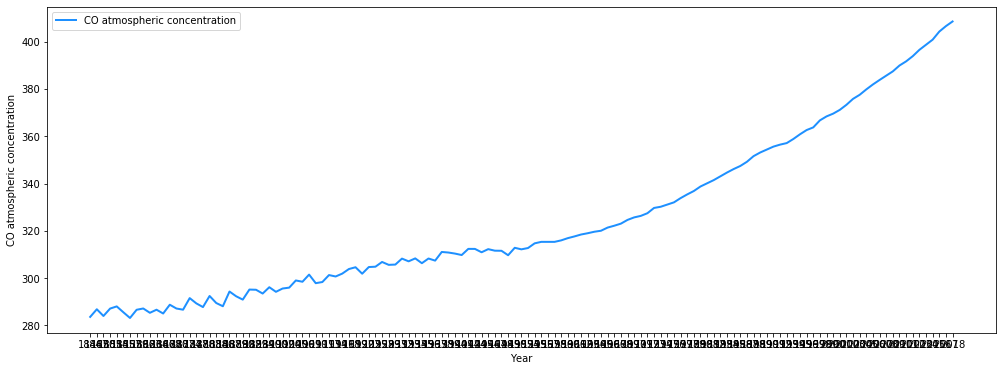

In [115]:
#plotting the Global CO₂ atmospheric concentration increasement from 1864-2018
x = co_concentration.Year[1740:]
y = co_concentration['CO₂ concentration'][1740:]
plt.figure(figsize=(17,6))

plt.plot(x, y, 'dodgerblue', label='CO atmospheric concentration', 
         linewidth=2)

plt.legend()
plt.xlabel('Year')
plt.ylabel('CO atmospheric concentration')

The years go from 1800 to 2018 and we can see how the CO₂ concentration in the atmosphere only keeps incresing. Either we stop this progression or humanit won't see the next century.

Text(0, 0.5, 'increse ordescrease in Temperature(℃)')

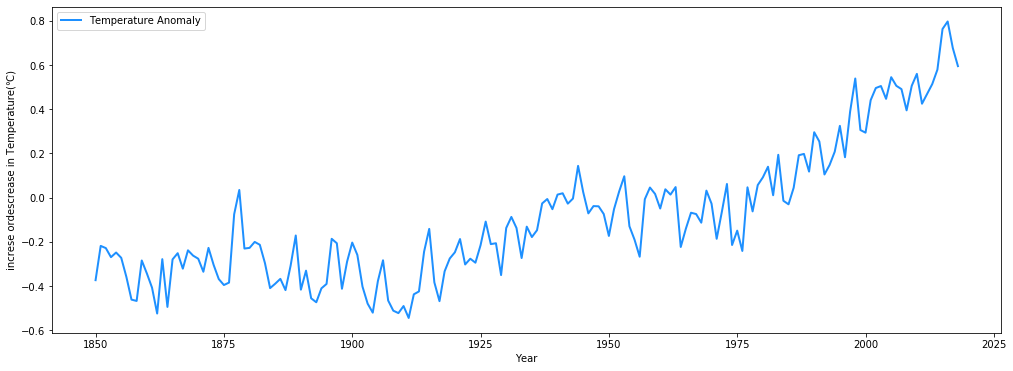

In [116]:
#plotting the median temperature anomaly over time to see how it's actually ingreasing 
x = temperature_a.Year
y = temperature_a['Median (℃)'].where(temperature_a['Country']=='Global')
plt.figure(figsize=(17,6))

plt.plot(x, y, 'dodgerblue', label='Temperature Anomaly', 
         linewidth=2)

plt.legend()
plt.xlabel('Year')
plt.ylabel('increse ordescrease in Temperature(℃)')

Here we can see the consequence of the previous chart. We see how the temperatures were kind of stable until the 1960's and are in anincreasing trend since then.

### The Ozone depletion crisis (1970)

In the 1970's scientists saw that there was a hole in the ozone layer on top of the Antartica and that it was growing due to the usage of Chlorofluorocarbons (CFC's). But humanity acted the right way and tackled the problem in the Montreal Protocol (and the succesive protocols) and managed to drastically reduce the emissions of that substance. This year we are starting to see the first signs of recovery, it took more than 30 years but if we keep on this path we will have solved that crisis.
Here are two plots that ilustrate that:

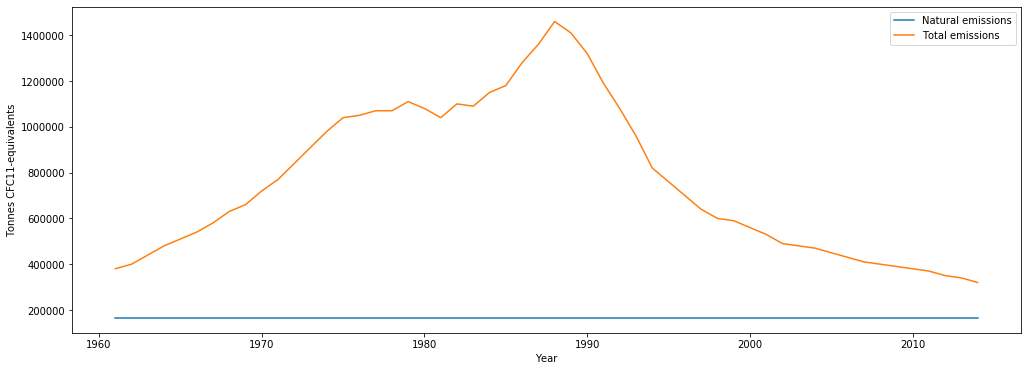

In [117]:
#ploting natural and total emissions to see that we have nearly stopped using CFC
plt.figure(figsize=(17,6))
plt.plot(ozone.Year,ozone['Ozone-depleting emissions'].where(ozone['Entity']=='Natural emissions'), label='Natural emissions')
plt.xlabel('Year')
plt.ylabel('Tonnes CFC11-equivalents')
plt.plot(ozone.Year, ozone['Ozone-depleting emissions'].where(ozone['Entity']=='Total emissions'), label='Total emissions')
plt.legend(['Natural emissions', 'Total emissions'], loc='upper right')

Here we see how the emissions have indeed been decreasing since 1990 and that we are approaching the level of natural emissions.

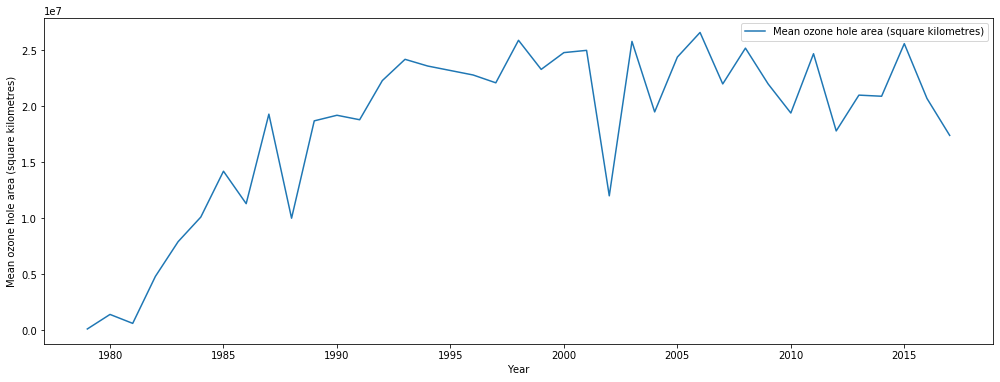

In [118]:
#ploting natural and total emissions Mean ozone hole area (square kilometres) to see if it has reduced
plt.figure(figsize=(17,6))
plt.plot(oz_hole.Year,oz_hole['Mean ozone hole area (square kilometres)'], label='Mean ozone hole area (square kilometres)')
plt.xlabel('Year')
plt.ylabel('Mean ozone hole area (square kilometres)')
plt.legend(['Mean ozone hole area (square kilometres)'], loc='upper right')

This is the area in kilometers squared of the Anartica's hole and we see it's reached a plateau. We took the right path there.

### Why not with global warming then? 

How come are we not taking the same path regarding the CO₂ emissions?

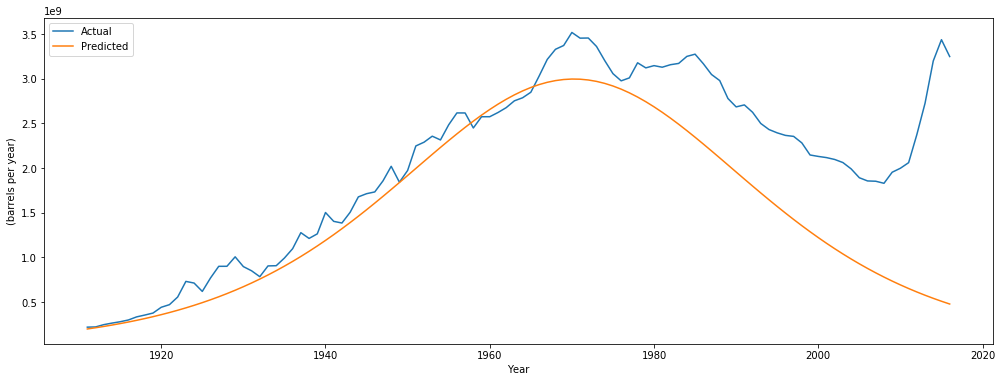

In [119]:
#ploting predicted and actual emissions to see if it the prediction came true
plt.figure(figsize=(17,6))
plt.plot(hubbert_peak.Year,hubbert_peak['Actual'],label='Actual')
plt.xlabel('Year')
plt.ylabel('(barrels per year)')
plt.plot(hubbert_peak.Year,hubbert_peak['Predicted'],label='Predicted')
plt.legend(['Actual', 'Predicted'], loc='upper left')

Here we can see that, despite Kyoto's Protocol (agreement to reduce the CO₂ emissions), and unlike Hubbert had predicte, the USA is increasing the production of Oil in the 20th century. This shows the disregard that the country's government has towards the welbeing of earth in the future generations.

Trump says that he need to make the american economy compatitive enough, therefore the country need to withdraw from the Paris agreement in 2016. But this excuse doesn't stand, because the productivity and cost effectivness of the renewable energies keep growing everyday. below there's we see the solarenergy example to ilustrate this.

Text(0, 0.5, 'Solar PV Module Cost($/Wp)')

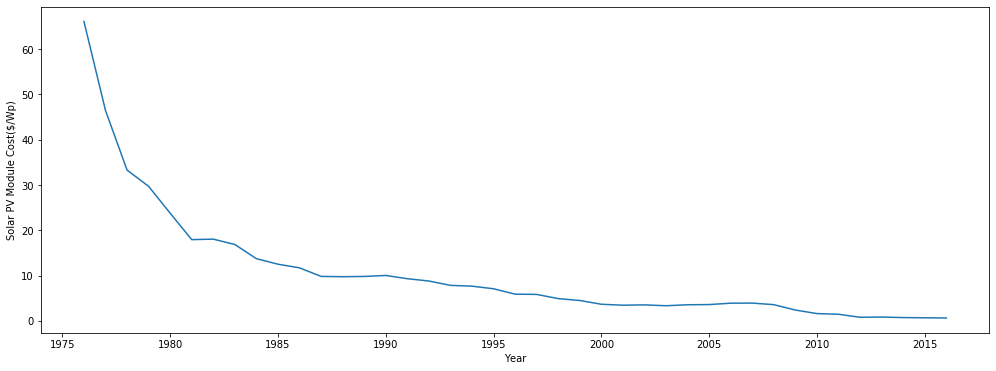

In [120]:
plt.figure(figsize=(17,6))
plt.plot(solar_price.Year,solar_price['Solar PV Module Cost($/Wp)'],label='Solar PV Module Cost($/Wp)')
plt.xlabel('Year')
plt.ylabel('Solar PV Module Cost($/Wp)')


Here we can see how the cost of the solarpanels has decreased dramatically through the years, but not only this, they also have increased their cumulative capacity, like the chart below shows.

Text(0, 0.5, 'Cumulative Installed Capacity(MWp)')

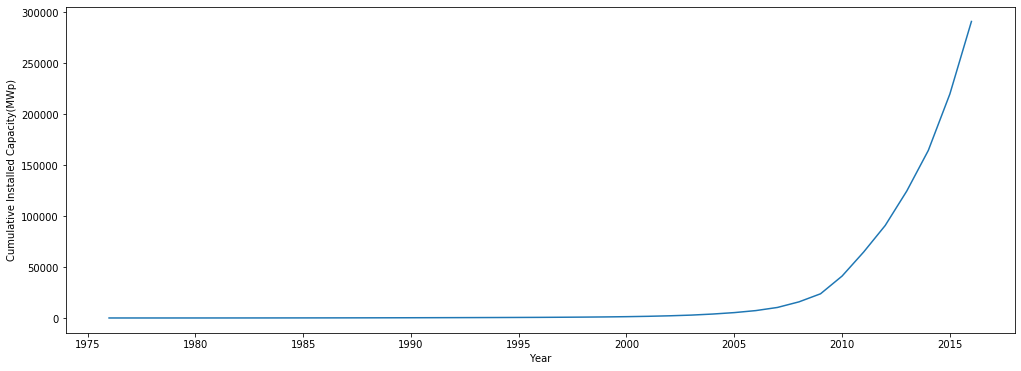

In [121]:
plt.figure(figsize=(17,6))
plt.plot(solar_price.Year,solar_price['Cumulative Installed Capacity(MWp)'],label='Cumulative Installed Capacity(MWp)')
plt.xlabel('Year')
plt.ylabel('Cumulative Installed Capacity(MWp)')

### Therefore, What is stopping __us__ from taking action?

Now that we now that the competivity excuse isn't valid anymore, we can assume that the only reason why the second most contaminating country on Earth is disregarding it's health is that those making the decisions and policies have interests in the industry of fossil fuels.

Therefore, they want to make the most profit they can before having to switch to renewable energies, but will it be too late by then, we don't know. 

Risk Management and decision making always have uncertainty, but it's not the moment to focus on hat uncertainty, it's the moment of taking __unanimous__ action and make sure that not even the USA and China can't build a bridge around the agreements and stick to the plan, otherwise our future is looking hot, in the worst sense of the word.

..................................................................................................................................................................................................................Bootcamp's Final Project
..................................................................................................................................................................................................................Ironhack: Data March2020
..................................................................................................................................................................................................................by Andreu Carreño Mateu